
Linear and Non-Linear Smoothing

In [1]:
import numpy as np
from skimage.io import imread
from skimage.restoration import denoise_bilateral,denoise_nl_means,estimate_sigma
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image,ImageFilter,ImageEnhance
from scipy import ndimage,misc
import matplotlib.pylab as pylab
from skimage import img_as_ubyte

In [2]:
def plot_image(image,title=""):
    pylab.title(title,size=20), pylab.imshow(image)
    pylab.axis("off")

def plot_hist(r,g,b,title=""):
    r,g,b = img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(),bins=256,range=(0,256),color="r",alpha=0.5)
    pylab.hist(np.array(g).ravel(),bins=256,range=(0,256),color="g",alpha=0.5)
    pylab.hist(np.array(b).ravel(),bins=256,range=(0,256),color="b",alpha=0.5)
    pylab.title(title,size=20)
    pylab.xlabel("Pixel Value",size=20)
    pylab.ylabel("Frequency",size=20)

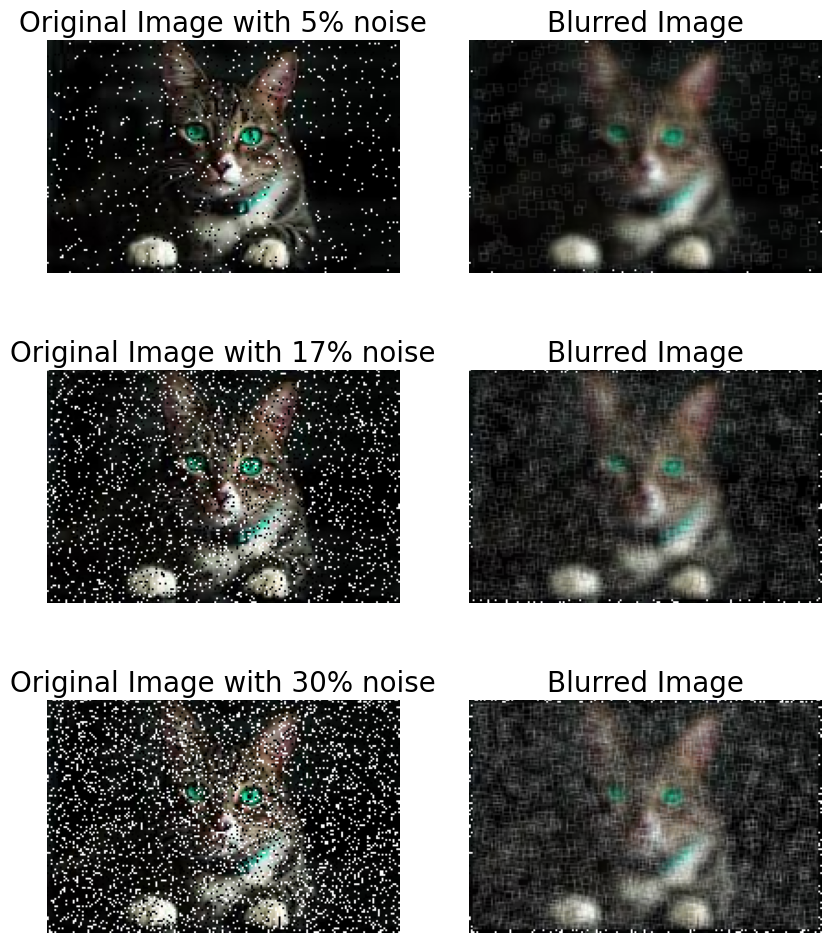

In [4]:
i = 1
pylab.figure(figsize=(10,25))
for prop_noise in np.linspace(0.05,0.3,3):
    im = Image.open("image.jpg")
    n = int(im.width*im.height*prop_noise)
    x,y = np.random.randint(0,im.width,n),np.random.randint(0,im.height,n)
    for (x,y) in zip(x,y):
        im.putpixel((x,y),((0,0,0) if np.random.rand() < 0.5 else (255,255,255)))
    
    im.save("output/rkm_"+str(prop_noise)+".jpg")
    pylab.subplot(6,2,i),plot_image(im,'Original Image with '+str(int(prop_noise*100))+'% noise')
    i += 1
    im1 = im.filter(ImageFilter.BLUR)
    pylab.subplot(6,2,i),plot_image(im1,'Blurred Image')
    i += 1

pylab.show()


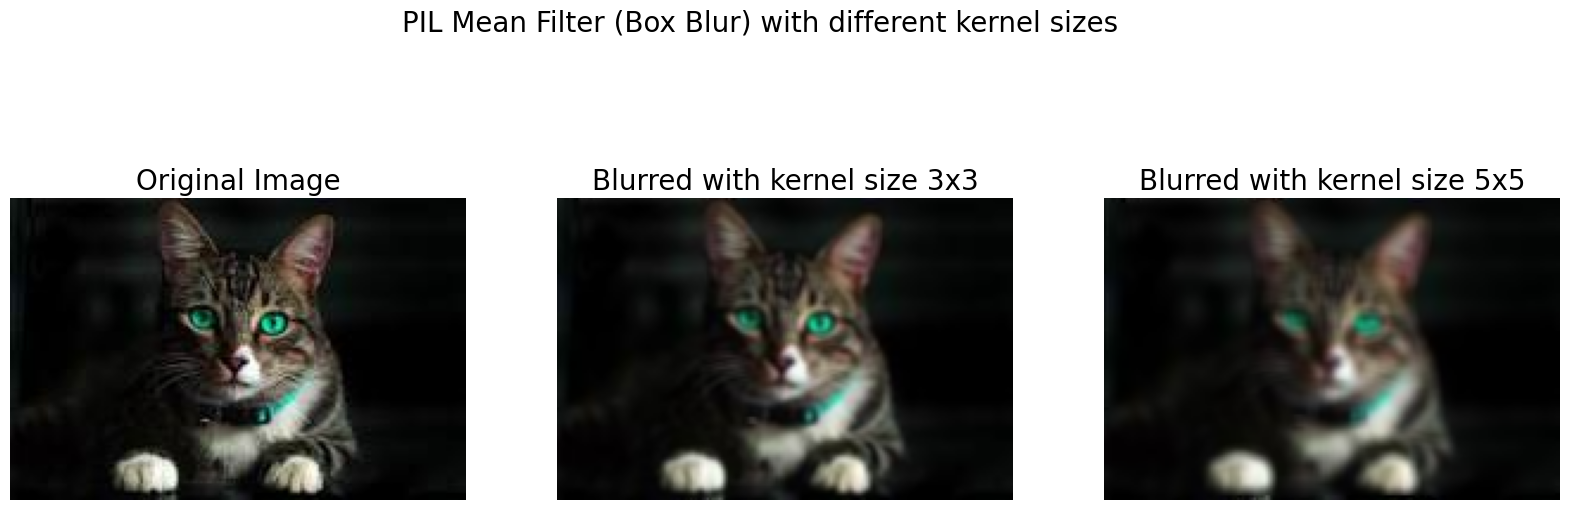

In [5]:
im = Image.open("image.jpg")
pylab.figure(figsize=(20,7))
pylab.subplot(1,3,1),plot_image(im,'Original Image')
pylab.axis("off")
for n in [3,5]:
    box_blur_kernel = np.reshape(np.ones(n*n),(n,n))/(n*n)
    im1 = im.filter(ImageFilter.Kernel((n,n),box_blur_kernel.flatten()))
    pylab.subplot(1,3,(2 if n==3 else 3))
    plot_image(im1,'Blurred with kernel size '+ str(n)+'x'+str(n))

pylab.suptitle("PIL Mean Filter (Box Blur) with different kernel sizes",size=20)
pylab.show()



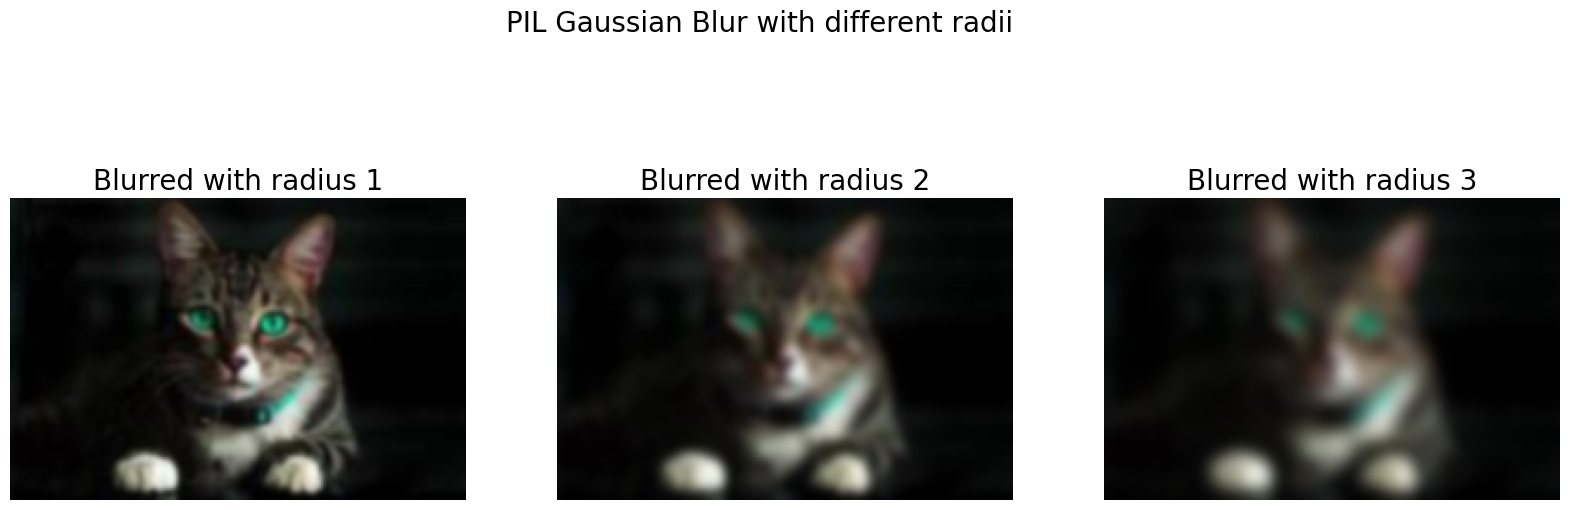

In [6]:
im = Image.open("image.jpg")
pylab.figure(figsize=(20,7))
i = 1
for radius in range(1,4):
    im1 = im.filter(ImageFilter.GaussianBlur(radius))
    pylab.subplot(1,3,i),plot_image(im1,'Blurred with radius '+str(radius))
    i += 1
pylab.suptitle("PIL Gaussian Blur with different radii",size=20)
pylab.show()

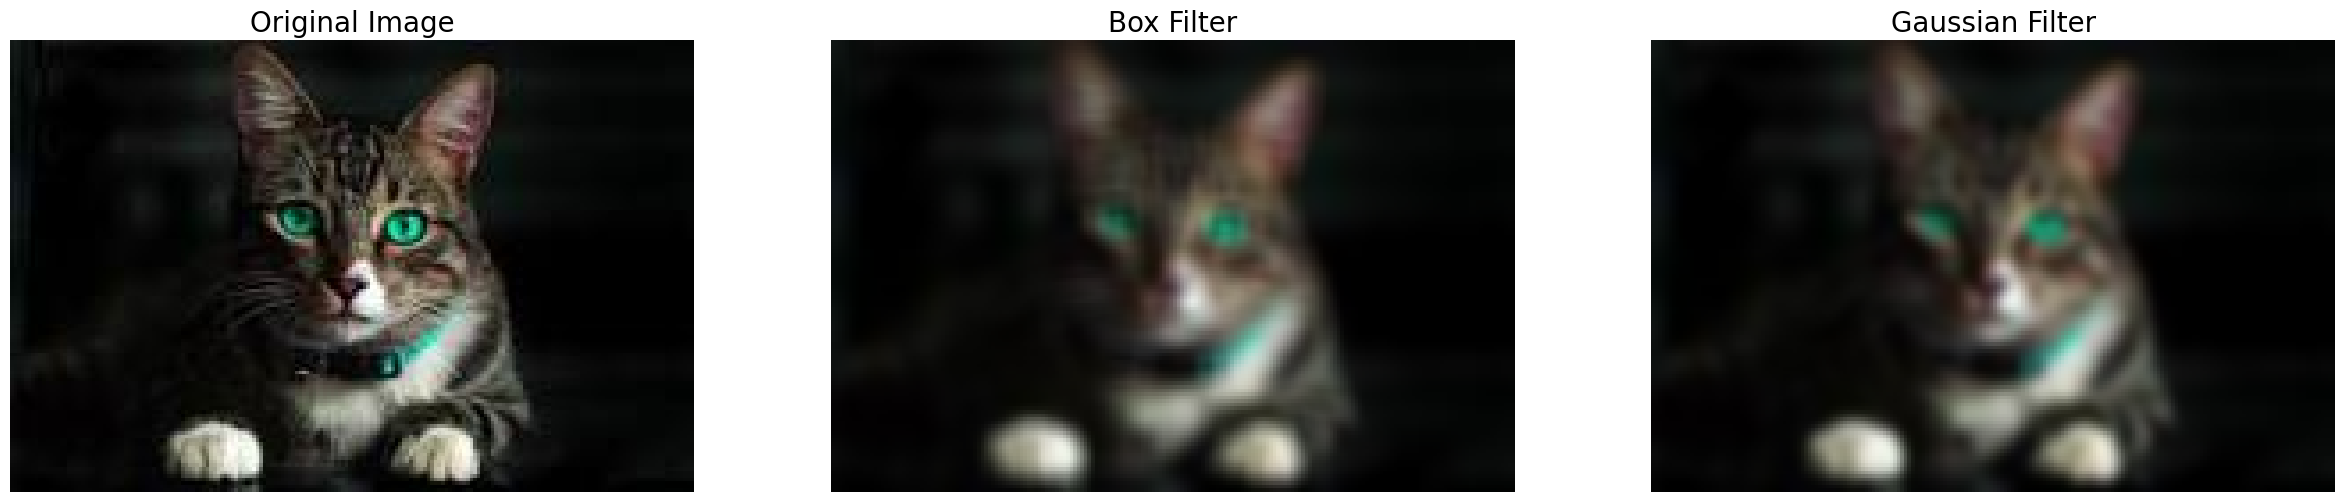

In [8]:
#Comparing smoothing with box and Gaussian kernels using SciPy ndimage
from scipy import misc, ndimage
import matplotlib.pylab as pylab

im = imread("image.jpg")
k = 7
im_box = ndimage.uniform_filter(im,size=(k,k,1))
s = 2
t = (((k-1)/2)-0.5)/s 

im_gaussian = ndimage.gaussian_filter(im,sigma=(s,s,0),truncate=t)
fig = pylab.figure(figsize=(30,10))
pylab.subplot(131),plot_image(im,"Original Image")
pylab.subplot(132),plot_image(im_box,"Box Filter")
pylab.subplot(133),plot_image(im_gaussian,"Gaussian Filter")
pylab.show()

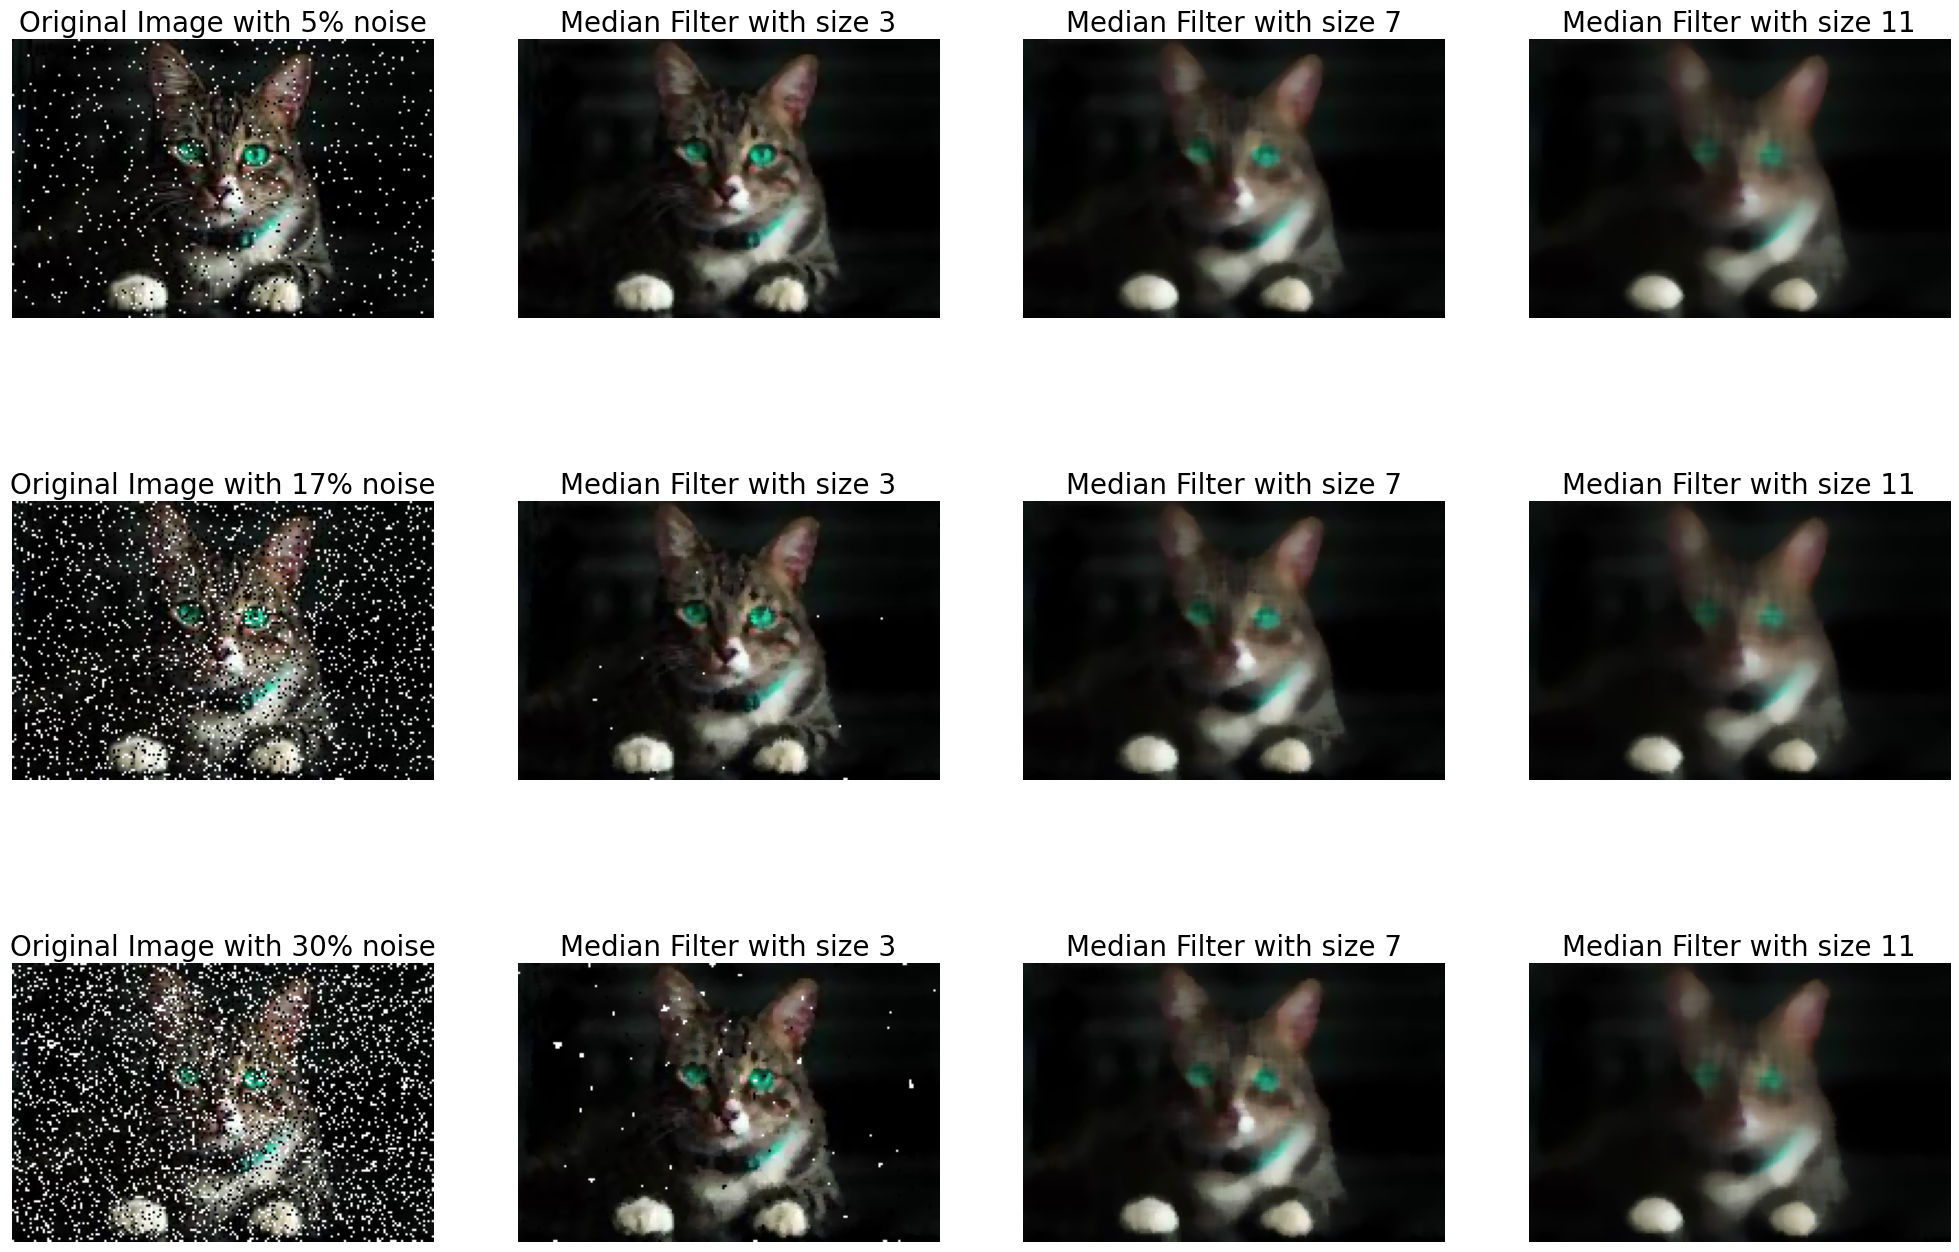

In [9]:
# using median filter
i = 1
pylab.figure(figsize=(25,35))
for prop_noise in np.linspace(0.05,0.3,3):
    im = Image.open("image.jpg")
    n = int(im.width*im.height*prop_noise)
    x,y = np.random.randint(0,im.width,n),np.random.randint(0,im.height,n)
    for (x,y) in zip(x,y):
        im.putpixel((x,y),((0,0,0) if np.random.rand() < 0.5 else (255,255,255)))
    im.save("output/rkm_"+str(prop_noise)+".jpg")

    pylab.subplot(6,4,i)
    plot_image(im,'Original Image with '+str(int(prop_noise*100))+'% noise')
    i += 1
    for sz in [3,7,11]:
        im1 = im.filter(ImageFilter.MedianFilter(size=sz))
        pylab.subplot(6,4,i),plot_image(im1,'Median Filter with size '+str(sz))
        i += 1

pylab.show()

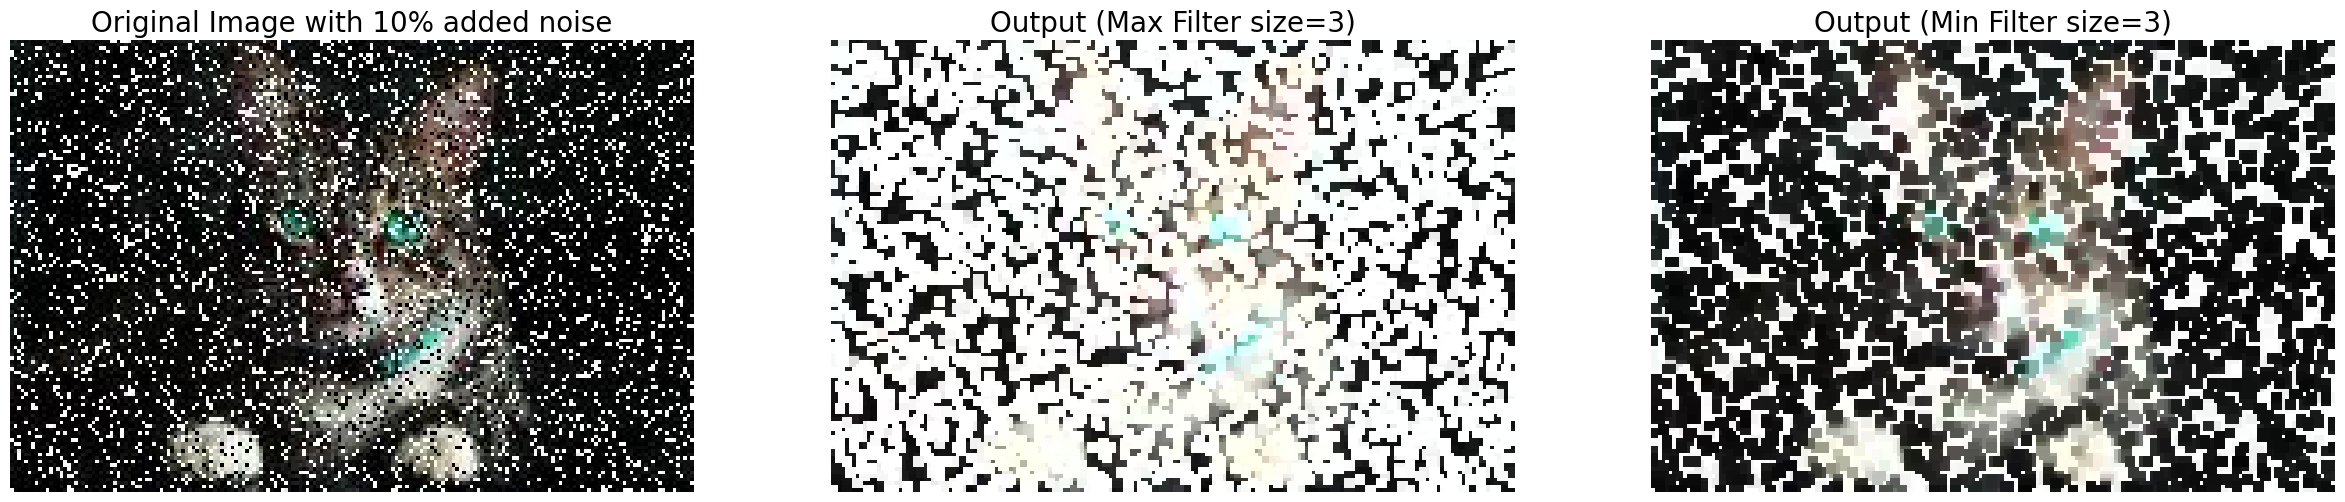

In [10]:
 # Using max and min filter
im = Image.open('output/rkm_0.3.jpg')
pylab.figure(figsize=(30,10))
sz = 3
pylab.subplot(1,3,1)
plot_image(im, 'Original Image with 10% added noise')
im1 = im.filter(ImageFilter.MaxFilter(size=sz))
pylab.subplot(1,3,2), plot_image(im1, 'Output (Max Filter size=' + str(sz)+ ')')
im1 = im1.filter(ImageFilter.MinFilter(size=sz))
pylab.subplot(1,3,3), plot_image(im1, 'Output (Min Filter size=' + str(sz)+ ')')
pylab.show()
